# Problem Statement: Predict whether an employee will churn (Attrition) based on various features.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

* Loading dataset 

In [4]:
df = pd.read_csv(r'D:\Study\Data Associate\HR-Employee-Attrition.csv')

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<Axes: xlabel='Attrition', ylabel='Density'>

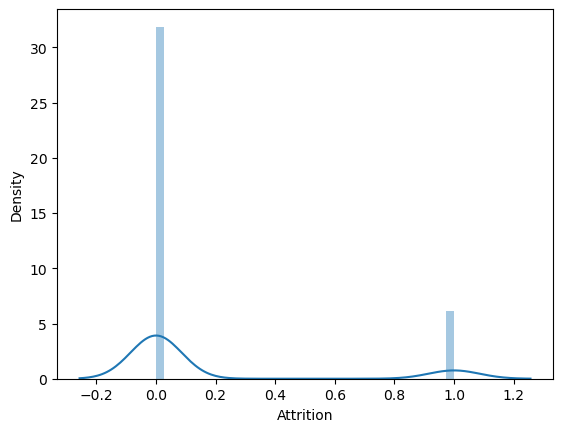

In [63]:
sns.distplot(df["Attrition"])

<Axes: xlabel='Age', ylabel='count'>

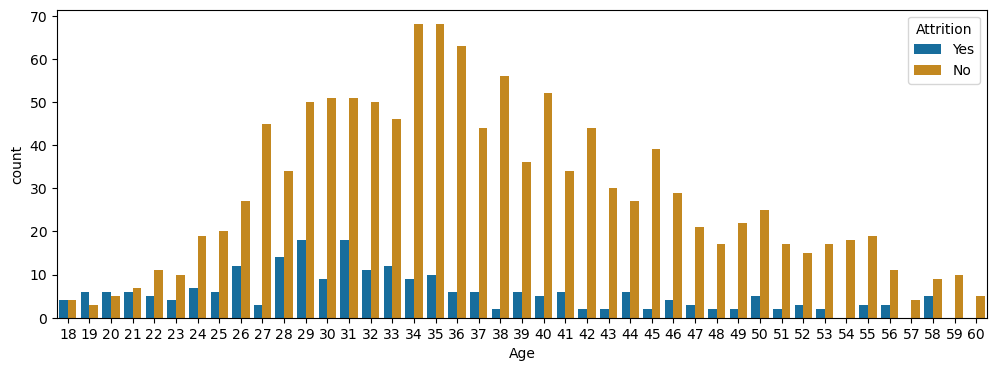

In [19]:
plt.subplots(figsize=(12,4))
sns.countplot(x='Age', hue = 'Attrition', data = df, palette = 'colorblind')

# Deleting unnecessary columns

In [21]:
df = df.drop('Over18', axis = 1)
df = df.drop('EmployeeNumber', axis = 1)
df = df.drop('StandardHours', axis = 1)
df = df.drop('EmployeeCount', axis = 1)

# Displaying Correlation 

In [57]:
df.corr()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_year
Attrition,1.000000,0.000074,-0.056605,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,-0.006846,...,-0.045872,-0.137145,-0.171571,-0.059478,-0.063939,-0.136932,-0.160545,-0.033019,-0.156199,-0.159205
BusinessTravel,0.000074,1.000000,-0.004103,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,0.026528,...,-0.035986,-0.016727,0.034144,0.015240,-0.011256,-0.014720,-0.011497,-0.032591,-0.022636,0.024751
DailyRate,-0.056605,-0.004103,1.000000,0.007796,-0.004738,-0.016550,0.038129,0.018462,-0.011194,0.022916,...,0.008530,0.041786,0.014877,0.002227,-0.037791,-0.032461,0.010997,-0.033431,-0.025849,0.010557
Department,0.063991,-0.009044,0.007796,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,-0.004144,...,-0.022414,-0.012193,-0.015685,0.036875,0.026383,0.023308,0.056315,0.040061,0.034282,-0.031882
DistanceFromHome,0.077924,-0.024469,-0.004738,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,0.031131,...,0.006557,0.044872,0.004560,-0.036942,-0.026556,0.009038,0.018845,0.010029,0.014406,-0.001686
Education,-0.031373,0.000757,-0.016550,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,0.016775,...,-0.009118,0.018422,0.148188,-0.025100,0.009819,0.067737,0.060236,0.054254,0.069065,0.208034
EducationField,0.026846,0.023724,0.038129,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,-0.021941,...,-0.004378,-0.016185,-0.027833,0.049195,0.041191,-0.018987,-0.010506,0.002326,-0.004130,-0.040873
EnvironmentSatisfaction,-0.103369,0.004174,0.018462,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,-0.049857,...,0.007665,0.003432,-0.002900,-0.019359,0.027627,0.000657,0.018007,0.016194,-0.004999,0.010146
Gender,0.029453,-0.032981,-0.011194,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,-0.000478,...,0.022868,0.012716,-0.046875,-0.038787,-0.002753,-0.030797,-0.041483,-0.026985,-0.030599,-0.036311
HourlyRate,-0.006846,0.026528,0.022916,-0.004144,0.031131,0.016775,-0.021941,-0.049857,-0.000478,1.000000,...,0.001330,0.050263,-0.002306,-0.008548,-0.004607,-0.020122,-0.024106,-0.026716,-0.020123,0.024287


<Axes: >

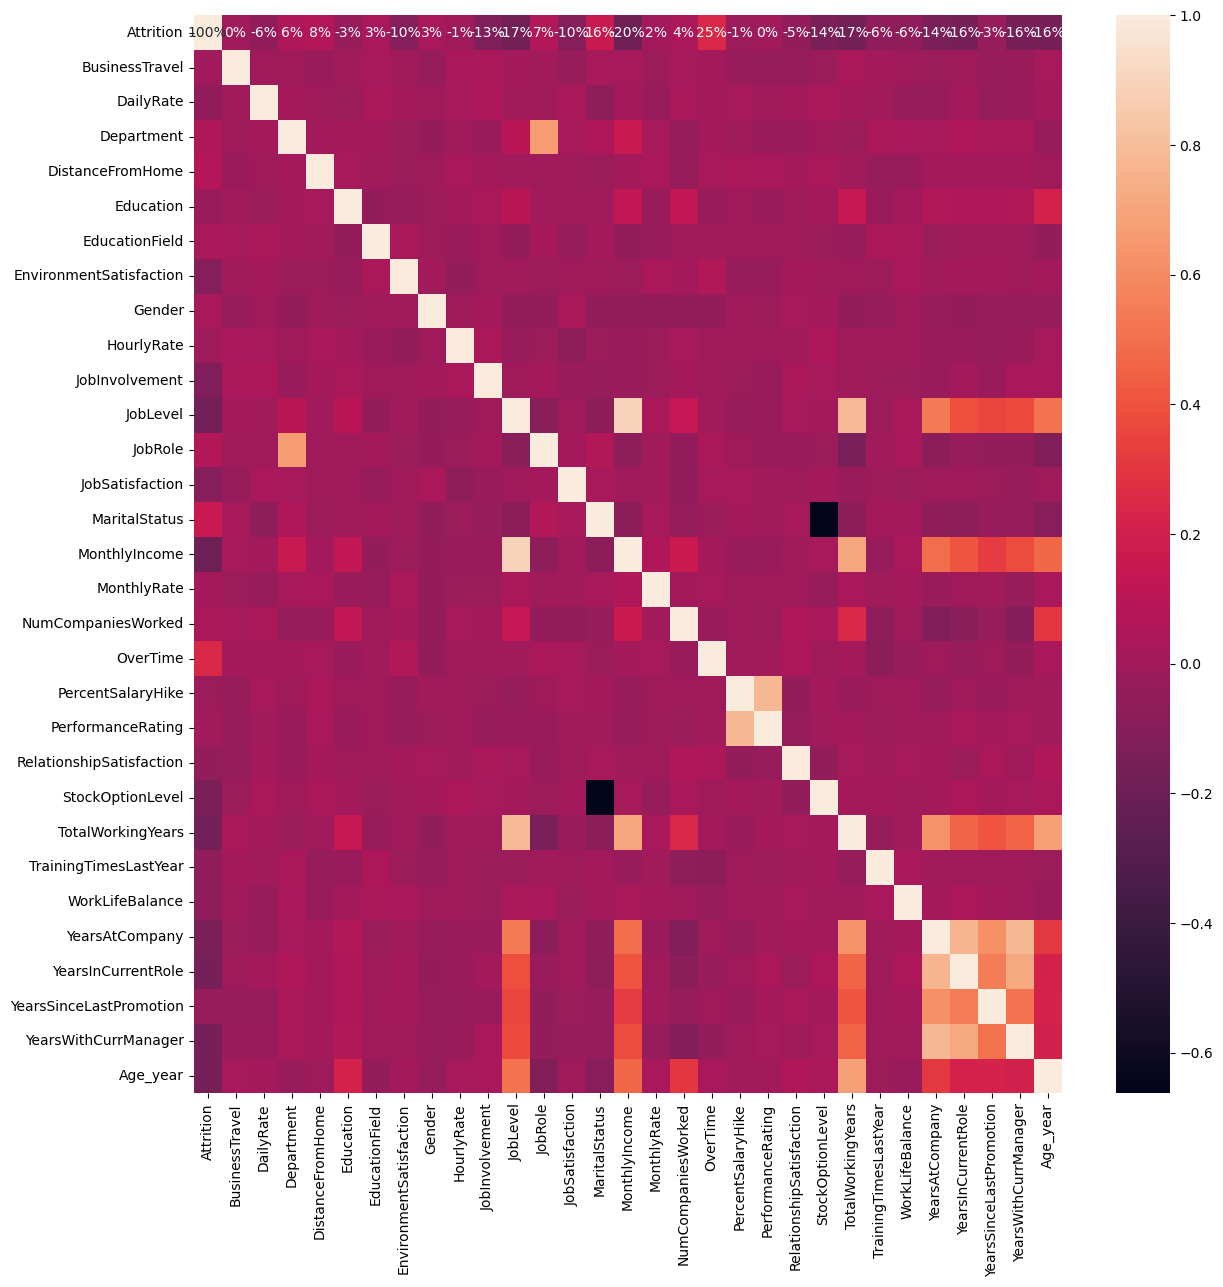

In [59]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [27]:
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

In [29]:
df["Age_year"] = df["Age"]

In [31]:
df = df.drop('Age', axis = 1)

In [33]:
df

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_year
0,1,2,624,2,0,1,1,1,0,64,...,0,0,8,0,0,6,4,0,5,23
1,0,1,113,1,7,0,1,2,1,31,...,3,1,10,3,2,10,7,1,7,31
2,1,2,805,1,1,1,4,3,1,62,...,1,0,7,3,2,0,0,0,0,19
3,0,1,820,1,2,3,1,3,0,26,...,2,0,8,3,2,8,7,3,0,15
4,0,2,312,1,1,0,3,0,1,10,...,3,1,6,3,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,494,1,22,1,3,2,1,11,...,2,1,17,3,2,5,2,0,3,18
1466,0,2,327,1,5,0,3,3,1,12,...,0,1,9,5,2,7,7,1,7,21
1467,0,2,39,1,3,2,1,1,1,57,...,1,1,6,0,2,6,2,0,3,9
1468,0,1,579,2,1,2,3,3,1,33,...,3,0,17,3,1,9,6,0,8,31


In [35]:
X = df.drop('Attrition',axis=1)
y = df['Attrition']

In [211]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=20)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (1176, 30)
Shape of y_train =  (1176,)
Shape of X_test =  (294, 30)
Shape of y_test =  (294,)


In [213]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.fit_transform(X_test)

#  Applying Random Forest Classifier

In [189]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=51, criterion='gini')
classifier.fit(X_train, y_train)
print(100 * classifier.score(X_test, y_test))

84.01360544217688


In [149]:
from sklearn.model_selection import cross_val_score

[0.9        0.9        0.83333333 0.8        0.82758621 0.82758621
 0.82758621 0.86206897 0.82758621 0.82758621]
Avg: 84.33333333333334


In [209]:
scores1 = cross_val_score(RandomForestClassifier
                          (n_estimators=100),X_test,
                          y_test, cv=5)
print("Avg Score for Estimators=5 and CV=10 :",100 * np.average(scores1))

Avg Score for Estimators=5 and CV=10 : 83.67036820572764


In [203]:
classifier1 = RandomForestClassifier(n_estimators=50, criterion='gini',random_state=51)
classifier1.fit(X_train, y_train)
print(100 * classifier1.score(X_test, y_test))

86.39455782312925


# Applying Decision Tree Classifier

In [105]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion='gini', random_state=60)
classifier2.fit(X_train, y_train)
print(100 * classifier2.score(X_test, y_test))

81.29251700680273


# Applying Naive Bayes Algorithm

In [107]:
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit(X_train, y_train)
print(100 * classifier3.score(X_test, y_test))

79.59183673469387


# Applying Bernoulli Naive Bayes

In [111]:
from sklearn.naive_bayes import BernoulliNB
classifier_b = BernoulliNB()
classifier_b.fit(X_train, y_train)

print(100 * classifier_b.score(X_test, y_test))

85.71428571428571


# Apply K Nearest Neighbor Classification Algorithm

In [113]:
from sklearn.neighbors import KNeighborsClassifier
classifier4 = KNeighborsClassifier()
#default k value is 5
classifier4.fit(X_train, y_train)
print(100 * classifier4.score(X_test, y_test))

81.97278911564626


In [53]:
classifier5 = KNeighborsClassifier(n_neighbors=70)          

classifier5.fit(X_train, y_train)
print(100 * classifier5.score(X_test, y_test))

82.6530612244898


In [81]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [83]:
y_pred=classifier1.predict(X_test)

In [85]:
y_test

1261    0
434     0
313     0
1182    0
446     0
       ..
1059    0
1374    0
326     0
283     0
855     0
Name: Attrition, Length: 294, dtype: int32

In [87]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.1360544217687075


In [89]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.1360544217687075


In [91]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.36885555678165877


In [99]:
from sklearn.metrics import r2_score
print("R_Squared",r2_score(y_test,y_pred))

R_Squared 0.05107722101186152


In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision
precision = precision_score(y_test, y_pred)
# Calculate recall
recall = recall_score(y_test, y_pred)
# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8639455782312925
Precision: 0.9230769230769231
Recall: 0.23529411764705882
F1 Score: 0.375


In [119]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
def accuracy_report(y_test,y_pred):
    print(f'confusion Matrix :\n{confusion_matrix(y_test,y_pred)}\n')
    print(f'Accuracy : {accuracy_score(y_test,y_pred)}\n')
    print(f'Classification Report :\n {classification_report(y_test,y_pred)}\n')

accuracy_report(y_test,y_pred)

confusion Matrix :
[[242   1]
 [ 39  12]]

Accuracy : 0.8639455782312925

Classification Report :
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       243
           1       0.92      0.24      0.38        51

    accuracy                           0.86       294
   macro avg       0.89      0.62      0.65       294
weighted avg       0.87      0.86      0.83       294


